In [8]:
import MySQLdb

import vincent 
from vincent import AxisProperties, PropertySet, ValueRef
import random

import pandas as pd
vincent.initialize_notebook()

In [9]:
cats = {
    "swim_stat": 9,
    "fly_stat": 10,
    "run_stat": 11,
    "power_stat": 12,
    "stamina_stat": 15,
    "hat": 16,
    "intellegence": 17,
    "trips": 18,
    "luck": 19
}

filtered_cats = {
    "swim_stat": 9,
    "fly_stat": 10,
    "run_stat": 11,
    "power_stat": 12
}

courses = [
    "crab_pool",
    "stump_valley",
    "mushroom_forest",
    "block_canyon",
    "aquamarine",
    "topaz",
    "peridot",
    "garnet",
    "onix",
    "diamond",
    "overall"
]

prediction_names = [
    "filtered_stochastic",
    "unfiltered_stochastic",
    "filtered_batch",
    "unfiltered_batch",
    "filtered_stochastic_final",
    "unfiltered_stochastic_final",
    "filtered_batch_final",
    "unfiltered_batch_final",
    "filtered_stochastic_power",
    "unfiltered_stochastic_power",
    "filtered_batch_power",
    "unfiltered_batch_power",
    "filtered_stochastic_fina_power",
    "unfiltered_stochasticl_final_power",
    "filtered_batch_final_power",
    "unfiltered_batch_final_power",
    "average_prediction"
]

In [28]:
# connect
db = MySQLdb.connect(host="localhost", user="root", passwd="", db="Chao")

# create a database cursor
cursor = db.cursor()

In [11]:
# execute SQL select statement
cursor.execute("SELECT * FROM Chao")

# get the number of rows in the resultset
numchao = int(cursor.rowcount)

chao_map = {}
for x in range(0,numchao):
    row = cursor.fetchone()
    # fill map {chao_name: "swim": swim_stat, "fly": fly_stat ... up to luck}
    stat_map = {}
    for cat in cats.keys():
        stat_map[cat] = int(row[cats[cat]]) if int(row[cats[cat]]) > 1 else 0
    chao_map[row[1]] = stat_map
print chao_map.get('peaches')

{'swim_stat': 805, 'fly_stat': 728, 'power_stat': 383, 'stamina_stat': 159, 'trips': 0, 'run_stat': 1235, 'hat': 0, 'intellegence': 20, 'luck': 20}


In [12]:
max_stat_map = {}
for cat in cats.keys():

    # execute SQL select statement
    cursor.execute("SELECT MAX("+cat+") FROM Chao")
    
    row = cursor.fetchone()
    max_stat_map[cat] = float(row[0])
    if max_stat_map[cat] < 1:
        max_stat_map[cat] = 1.0
print max_stat_map

{'swim_stat': 2981.0, 'fly_stat': 3015.0, 'power_stat': 3016.0, 'stamina_stat': 912.0, 'trips': 1.0, 'run_stat': 3031.0, 'hat': 1.0, 'intellegence': 20.0, 'luck': 161.0}


In [13]:
filtered = False
raw = False
group_by = 16

def plot_results(data, course, names):
    # plot results
    print course
    stacked = vincent.StackedArea(data, iter_idx='index')
    stacked.axis_titles(x='Index', y='Data Value')
    stacked.legend(title='Categories')
    stacked.colors(brew='Set3')
    stacked.display()
    df = pd.DataFrame(data, index=names)
    del df['index']
    for i in [i*group_by for i in range(len(df.index) / group_by)]:
        print course
        grouped = vincent.GroupedBar(df[len(df.index)-i-group_by:len(df.index)-i])
        grouped.colors(brew='Set3')
        grouped.axis_titles(x='Dataset', y='Value')
        grouped.legend(title=course)
        grouped.width = 700
        grouped.height = 150
        grouped.display()


for course in courses:
    data_all = {}
    data = {}
    names = []

    # execute SQL select statement
    cursor.execute("SELECT * FROM results WHERE course = '"+course+"';")

    # get the number of rows in the resultset
    numrows = int(cursor.rowcount)

    prev_score = 200
    index = 0
    index_all = 0
    for x in range(0,numrows):
        index += 1
        index_all += 1
        row = cursor.fetchone()
        curr_score = row[3]
        chao_name = row[2]
        # check if done for group and can plot
        if prev_score < curr_score:
#             if data_all == {}:
#                 data_all = data.copy()
#             else:
#                 data_all = { k: [x + y for x, y in zip(data[k], data_all[k])] for k in data.keys() } # sum value lists from old and new map
            data["index"] = range(0, index-1, 1)
            plot_results(data, course, names)
            #reset
            data = {}
            names = []
            index = 1
        # get results (fill a map with the results data = {"swim": [last_stat...first_stat]})
        names = [chao_name] + names
        for cat in cats.keys():
            if (cat in filtered_cats.keys() and filtered) or not filtered:
                if raw:
                    if data.has_key(cat):
                        data[cat] = [int(chao_map[chao_name][cat])] + data[cat]
                    else:
                        data[cat] = [int(chao_map[chao_name][cat])]
                else:
                    if data.has_key(cat):
                        data[cat] = [round(int(chao_map[chao_name][cat])/max_stat_map[cat],2)] + data[cat]
                    else:
                        data[cat] = [round(int(chao_map[chao_name][cat])/max_stat_map[cat],2)]


        # update
        prev_score = curr_score
        
#     data_all = { k: [x + y for x, y in zip(data[k], data_all[k])] for k in data.keys() }
    data["index"] = range(0, index, 1)
#     data_all["index"] = range(0, index_all, 1)
#     for key in data_all.keys():
#         print len(data_all[key])
#         print data_all[key]
    plot_results(data, course, names)
#     plot_results(data_all, course)



crab_pool


crab_pool


crab_pool


crab_pool


crab_pool


crab_pool


crab_pool


crab_pool


crab_pool


crab_pool


crab_pool


crab_pool


crab_pool


crab_pool


crab_pool


crab_pool


crab_pool


crab_pool


crab_pool


crab_pool


crab_pool


crab_pool


crab_pool


crab_pool


crab_pool


crab_pool


stump_valley


stump_valley


stump_valley


stump_valley


stump_valley


stump_valley


stump_valley


stump_valley


stump_valley


stump_valley


stump_valley


stump_valley


stump_valley


stump_valley


stump_valley


stump_valley


stump_valley


stump_valley


stump_valley


stump_valley


stump_valley


stump_valley


stump_valley


stump_valley


stump_valley


stump_valley


mushroom_forest


mushroom_forest


mushroom_forest


mushroom_forest


mushroom_forest


mushroom_forest


mushroom_forest


mushroom_forest


mushroom_forest


mushroom_forest


mushroom_forest


mushroom_forest


mushroom_forest


mushroom_forest


mushroom_forest


mushroom_forest


mushroom_forest


mushroom_forest


mushroom_forest


mushroom_forest


mushroom_forest


mushroom_forest


mushroom_forest


mushroom_forest


mushroom_forest


mushroom_forest


block_canyon


block_canyon


block_canyon


block_canyon


block_canyon


block_canyon


block_canyon


block_canyon


block_canyon


block_canyon


block_canyon


block_canyon


block_canyon


block_canyon


block_canyon


block_canyon


block_canyon


block_canyon


block_canyon


block_canyon


block_canyon


block_canyon


block_canyon


block_canyon


block_canyon


block_canyon


aquamarine


aquamarine


aquamarine


aquamarine


aquamarine


aquamarine


aquamarine


aquamarine


aquamarine


aquamarine


aquamarine


aquamarine


aquamarine


aquamarine


aquamarine


aquamarine


aquamarine


aquamarine


aquamarine


aquamarine


aquamarine


aquamarine


aquamarine


aquamarine


aquamarine


aquamarine


topaz


topaz


topaz


topaz


topaz


topaz


topaz


topaz


topaz


topaz


topaz


topaz


topaz


topaz


topaz


peridot


peridot


peridot


peridot


peridot


peridot


peridot


peridot


peridot


peridot


peridot


peridot


peridot


peridot


peridot


garnet


garnet


garnet


garnet


garnet


garnet


garnet


garnet


garnet


garnet


garnet


garnet


garnet


garnet


garnet


onix


onix


onix


onix


onix


onix


onix


onix


onix


onix


onix


onix


onix


onix


onix


diamond


diamond


diamond


diamond


diamond


diamond


diamond


diamond


diamond


diamond


diamond


diamond


diamond


diamond


diamond


overall


overall


overall


overall


overall


overall


overall


overall


overall


overall


overall


overall


overall


overall


overall


In [29]:
course = "topaz"

# execute SQL select statement
cursor.execute("SELECT * FROM predictions WHERE course = '"+course+"' ORDER BY -round4 DESC, -round3 DESC;")

# get the number of rows in the resultset
numrows = int(cursor.rowcount)

prev_score = 200
index = range(0,17,1)
for x in range(0,numrows):
    row = cursor.fetchone()
    chao_name = row[1]
    print chao_name
    data_dict = {
        "predictions": list(row[3:20]),
        "prediction_names": prediction_names,
        "trueskill": ([row[20]+0.1] if row[20] is not None else [0])*17,
        "round1": ([row[21]] if row[21] is not None else [0])*17,
        "round2": ([row[22]-0.1] if row[22] is not None else [0])*17,
        "round3": ([row[23]-0.2] if row[23] is not None else [0])*17,
        "round4": ([row[24]-0.3] if row[24] is not None else [0])*17
    }
    predictions_df = pd.DataFrame(data_dict, index=index)
#     print predictions_df
    line = vincent.Line(predictions_df, 
                        columns=["predictions", "trueskill", "round1", "round2", "round3", "round4"], 
                         key_on="prediction_names"
                        )
    line.axis_titles(x='', y='place')
    line.legend(title='Categories')
    line.width = 700
    line.height = 150
    line.scales[0].type = 'ordinal'
    line.axes[0].properties = AxisProperties(
    labels=PropertySet(
        angle=ValueRef(value=45),
        align=ValueRef(value='left')
        )
    )
    line.display()

flyer


swimmer


honey


ziggy


dolphin


bub-gum


Mr.E


neptune


snowbow


xeon


devil


tiny


cascade


gills


angel


ram-baa


drgnfly


chaosm


peaches


buddha


ghost


quartz


echo


hope


phantom


cuckoo


dopey


pinky


1/2fish


limeguy


runfly


tallone


buddy


powim


dragon


diva


woody


pluto


dino


phoenix


WOW


jester


shiny


papoose


spike


flash


hiya


ownerbm


wave


fuji


yoshi


chai


star


zippy


pebbles


mario


minty


dash


unicorn


kosmo


rover


flame


bulb


edge


bamboo


luigi


bingo


elf


melody


wario


climber


scorpio


spring


antenna


rosebud


stinky


runner


daisy


DK


peach


chaolee


gregg


leafy


chaobob


bruno


atom


chaosky


roxy


bubbles


bowser


olive


cash


teal


casino


chaoko


chaorro


champ


flyfish


zora


goron


rocky


deepblu


mime


easter


slick


aqua


sloth


vasuki


chilly


chacha


boatkit


sparkle


posidon


shinejr


pan-da


toad


kitty


knights


breeze


pink


tealjr


pothead


can-man


tulip


skull


metal-s


tealeaf


swimjr


heswim


daswim


purple


yellow


hrnfrog


lime


skyblue


ash


boo


waluigi


shadow


dingy


red


suprsnc


hefly


jack-o


flyjr


dafly


drill


metal-m


chappy


grey


brown


zack


darun


runjr


herun


tween


dapower


climbjr


hepower


jr


In [30]:
course = "topaz"
round_chao_counts = [48, 48, 96, 160]

# execute SQL select statement
cursor.execute("SELECT * FROM predictions WHERE course = '"+course+"' ORDER BY -round4 DESC, -round3 DESC;")

# get the number of rows in the resultset
numrows = int(cursor.rowcount)

for x in range(0,numrows):
    row = cursor.fetchone()
    chao_name = row[1]
    print chao_name
    data_dict = {
        "names": ["trueskill", "round1", "round2", "round3", "round4"],
        "scores": [([(row[20]-round_chao_counts[-1])/float(round_chao_counts[-1])*-1+0.01] if row[20] is not None else [0]),
                    ([(row[21]-round_chao_counts[0])/float(round_chao_counts[0])*-1] if row[21] is not None else [0]),
                    ([(row[22]-round_chao_counts[1])/float(round_chao_counts[1])*-1-0.01] if row[22] is not None else [0]),
                    ([(row[23]-round_chao_counts[2])/float(round_chao_counts[2])*-1-0.02] if row[23] is not None else [0]),
                    ([(row[24]-round_chao_counts[3])/float(round_chao_counts[3])*-1-0.03] if row[24] is not None else [0])]
    }
    line = vincent.Line(data_dict["scores"], key_on=data_dict["names"])
#     line.axis_titles(x='', y='place')
#     line.legend(title='Categories')
    line.width = 700
    line.height = 150
    line.scales[0].type = 'ordinal'
    line.axes[0].properties = AxisProperties(
    labels=PropertySet(
        angle=ValueRef(value=45),
        align=ValueRef(value='left')
        )
    )
    line.display()

flyer


swimmer


honey


ziggy


dolphin


bub-gum


Mr.E


neptune


snowbow


xeon


devil


tiny


cascade


gills


angel


ram-baa


drgnfly


chaosm


peaches


buddha


ghost


quartz


echo


hope


phantom


cuckoo


dopey


pinky


1/2fish


limeguy


runfly


tallone


buddy


powim


dragon


diva


woody


pluto


dino


phoenix


WOW


jester


shiny


papoose


spike


flash


hiya


ownerbm


wave


fuji


yoshi


chai


star


zippy


pebbles


mario


minty


dash


unicorn


kosmo


rover


flame


bulb


edge


bamboo


luigi


bingo


elf


melody


wario


climber


scorpio


spring


antenna


rosebud


stinky


runner


daisy


DK


peach


chaolee


gregg


leafy


chaobob


bruno


atom


chaosky


roxy


bubbles


bowser


olive


cash


teal


casino


chaoko


chaorro


champ


flyfish


zora


goron


rocky


deepblu


mime


easter


slick


aqua


sloth


vasuki


chilly


chacha


boatkit


sparkle


posidon


shinejr


pan-da


toad


kitty


knights


breeze


pink


tealjr


pothead


can-man


tulip


skull


metal-s


tealeaf


swimjr


heswim


daswim


purple


yellow


hrnfrog


lime


skyblue


ash


boo


waluigi


shadow


dingy


red


suprsnc


hefly


jack-o


flyjr


dafly


drill


metal-m


chappy


grey


brown


zack


darun


runjr


herun


tween


dapower


climbjr


hepower


jr


In [16]:
for course in courses:
    print course
    # execute SQL select statement
    cursor.execute("SELECT * FROM thetas WHERE course = '{}'".format(course))

    # get the number of rows in the resultset
    numrows = int(cursor.rowcount)

    data_dict = {
        "prediction_names": prediction_names[:-1],
        "swim": [],
        "fly": [],
        "run": [],
        "power": [],
        "stamina": [],
        "hat": [],
        "intellegence": [],
        "trips": [],
        "luck": []
    }
    for x in xrange(0,numrows):
        row = cursor.fetchone()
        
        data_dict["swim"].append(row[6])
        data_dict["fly"].append(row[7])
        data_dict["run"].append(row[8])
        data_dict["power"].append(row[9])
        data_dict["stamina"].append(row[10])
        data_dict["hat"].append(row[11])
        data_dict["intellegence"].append(row[12])
        data_dict["trips"].append(row[13])
        data_dict["luck"].append(row[14])

    predictions_df = pd.DataFrame(data_dict)#, index=index)
    #     print predictions_df
    line = vincent.Line(predictions_df, 
                        columns=["swim", "fly", "run", "power", "stamina", "hat", "intellegence", "trips", "luck"], 
                         key_on="prediction_names"
                        )
    line.axis_titles(x='', y='place')
    line.legend(title='Categories')
    line.width = 700
    line.height = 150
    line.scales[0].type = 'ordinal'
    line.axes[0].properties = AxisProperties(
    labels=PropertySet(
        angle=ValueRef(value=45),
        align=ValueRef(value='left')
        )
    )
    line.display()

crab_pool


stump_valley


mushroom_forest


block_canyon


aquamarine


topaz


peridot


garnet


onix


diamond


overall


In [38]:
for course in courses:
    print course
    
    # execute SQL select statement
    cursor.execute("SELECT * FROM predictions WHERE course = '{}';".format(course))

    # get the number of rows in the resultset
    numrows = int(cursor.rowcount)

    data_dict = {
        "prediction_names": prediction_names+["trueskill", "pagerank"],
        "error": [0]*19
    }

    for x in xrange(0,numrows):
        row = cursor.fetchone()

        for i in xrange(len(data_dict["error"])):
            try:
                data_dict["error"][i] += abs(row[i+3]-row[-1])
            except TypeError as e:
                try:
                    data_dict["error"][i] += abs(row[i+3]-row[-2])
                except TypeError as e:
                    continue

    predictions_df = pd.DataFrame(data_dict)#, index=index)
    #     print predictions_df
    line = vincent.Line(predictions_df, 
                        columns=["error"], 
                         key_on="prediction_names"
                        )
    line.axis_titles(x='', y='error')
    # line.legend(title='Categories')
    line.width = 700
    line.height = 150
    line.scales[0].type = 'ordinal'
    line.axes[0].properties = AxisProperties(
    labels=PropertySet(
        angle=ValueRef(value=45),
        align=ValueRef(value='left')
        )
    )
    print "min error - {}: error - {}".format(
        data_dict['prediction_names'][data_dict['error'].index(min(data_dict['error']))],
        min(data_dict['error']))
    line.display()

crab_pool
min error - trueskill: error - 560


stump_valley
min error - trueskill: error - 670


mushroom_forest
min error - trueskill: error - 1170


block_canyon
min error - trueskill: error - 588


aquamarine
min error - trueskill: error - 632


topaz
min error - pagerank: error - 2215


peridot
min error - pagerank: error - 0


garnet
min error - trueskill: error - 0


onix
min error - trueskill: error - 0


diamond
min error - trueskill: error - 0


overall
min error - trueskill: error - 0


In [31]:
name_groups = {
    1: [
        "toad",
        "boo",
        "bowser",
        "daisy",
        "luigi",
        "yoshi",
        "mario",
        "peach",
        "wario",
        "waluigi",
        "DK",
        "metal-m"
    ],
    2: [
        "purple",
        "skyblue",
        "brown",
        "yellow",
        "grey",
        "lime",
        "red",
        "pink"
    ],
    3: [
        "runner",
        "swimmer",
        "climber",
        "flyer"
    ],
    4: [
        "angel",
        "devil",
        "hope",
    ],
    5: [
        "neptune",
        "pluto",
        "rover",
        "honey",
        "bub-gum"
    ],
    6: [
        "chaosm",
        "ownerbm",
        "tallone",
        "chaosky",
        "chaolee",
        "chaorro",
        "chaobob",
        "chaoko"
    ],
    7: [
        "jr",
        "tween",
        "jack-o",
        "skull",
    ],
    8: [
        "boatkit",
        "pothead",
        "tealjr",
        "shinejr"
    ],
    9: [
        "can-man",
        "kitty",
        "pan-da",
        "ash"
    ]
}

In [32]:
course_set = "all"
name_set = 8

for i, names in name_groups.iteritems():
    if name_set == "all" or name_set == i:
        for course in courses:
            if course_set == "all" or course == course_set:
                print course
                # execute SQL select statement
                cursor.execute("SELECT * FROM predictions WHERE course = '{}'".format(course))

                # get the number of rows in the resultset
                numrows = int(cursor.rowcount)

                data_dict = {
                    "rounds": ['round1', 'round2', 'round3', 'round4'],
                }
                for x in xrange(0,numrows):
                    row = cursor.fetchone()

                    if row[1] in names:
                        data_dict[row[1]] = [row[-4] if row[-4] else 0,
                                             row[-3] if row[-3] else 0,
                                             row[-2] if row[-2] else 0,
                                             row[-1] if row[-1] else 0]

                predictions_df = pd.DataFrame(data_dict)#, index=index)
                #     print predictions_df
                line = vincent.Line(predictions_df, 
                                    columns=names, 
                                     key_on="rounds"
                                    )
                line.axis_titles(x='', y='place')
                line.legend(title='Categories')
                line.width = 700
            #     line.height = 150
                line.scales[0].type = 'ordinal'
                line.axes[0].properties = AxisProperties(
                labels=PropertySet(
                    angle=ValueRef(value=45),
                    align=ValueRef(value='left')
                    )
                )
                line.display()

crab_pool


stump_valley


mushroom_forest


block_canyon


aquamarine


topaz


peridot


garnet


onix


diamond


overall


In [33]:
course = "topaz"

# execute SQL select statement
cursor.execute("SELECT * FROM records_all WHERE course = '{}'".format(course))

# get the number of rows in the resultset
numrows = int(cursor.rowcount)

class RecordKeeper():
    
    def __init__(self):
        self.index_dict = {}
        self.matchups = []
        self.total_matches = []
        self.wins = []
        
    def add_matchup(self, winner, loser):
        name_a = min([winner, loser])
        name_b = max([winner, loser])
        if name_a in self.index_dict.keys() and name_b in self.index_dict[name_a].keys():
            idx = self.index_dict[name_a][name_b]
            self.total_matches[idx] = self.total_matches[idx] + 1
            idx2 = 0 if name_a == winner else 1
            self.wins[idx][idx2] = self.wins[idx][idx2] + 1
        else:
            idx = len(self.total_matches)
            if name_a in self.index_dict.keys():
                self.index_dict[name_a][name_b] = idx
            else:
                self.index_dict[name_a] = {name_b: idx}
            self.matchups.append([name_a, name_b])
            self.total_matches.append(1)
            self.wins.append([1,0] if name_a == winner else [0,1])
            
    def print_records(self, min_matches=2):
        for i, matchup in enumerate(self.matchups):
            wins_a = self.wins[i][0]
            wins_b = self.wins[i][1]
            matches = self.total_matches[i]
            if matches >= min_matches:
                if wins_a >= wins_b:
                    print "{} - {} = {} vs {} with {} total match".format(wins_a, wins_b,
                                                                    matchup[0], matchup[1], 
                                                                    matches)
                else:
                    print "{} - {} = {} vs {} with {} total match".format(wins_b, wins_a,
                                                                    matchup[1], matchup[0], 
                                                                    matches)
                    
    def get_records(self):
        records = []
        for i, matchup in enumerate(self.matchups):
            wins_a = self.wins[i][0]
            wins_b = self.wins[i][1]
            matches = self.total_matches[i]
            records.append((matchup[0], matchup[1], "-".join((str(wins_a),str(wins_b)))))
        return records

    def sort_records_by_total_matches(self):
        self.matchups = [x for (y,x) in sorted(zip(self.total_matches,self.matchups), key=lambda pair: pair[0], reverse=True)]
        self.wins = [x for (y,x) in sorted(zip(self.total_matches,self.wins), key=lambda pair: pair[0], reverse=True)]
        self.total_matches.sort(reverse=True)
            
            
def add_matchups(rc, order):
    if len(order) == 1:
        return rc
    else:
        for i in xrange(len(order)-1):
            rc.add_matchup(order[i], order[-1])
        rc = add_matchups(rc, order[0:-1])
        return rc

rc = RecordKeeper()
for x in xrange(0,numrows):
    row = cursor.fetchone()
    add_matchups(rc, row[2:])
rc.sort_records_by_total_matches()
rc.print_records()

3 - 3 = elf vs melody with 6 total match
4 - 2 = pebbles vs zippy with 6 total match
6 - 0 = minty vs unicorn with 6 total match
4 - 2 = pink vs yoshi with 6 total match
5 - 0 = cascade vs gills with 5 total match
4 - 1 = elf vs bamboo with 5 total match
3 - 2 = atom vs chaosky with 5 total match
5 - 0 = dopey vs jester with 5 total match
4 - 1 = waluigi vs mario with 5 total match
4 - 0 = WOW vs ownerbm with 4 total match
2 - 2 = papoose vs phoenix with 4 total match
2 - 2 = 1/2fish vs jester with 4 total match
2 - 2 = bruno vs bubbles with 4 total match
4 - 0 = chaolee vs teal with 4 total match
4 - 0 = bruno vs teal with 4 total match
4 - 0 = chaoko vs chaorro with 4 total match
3 - 1 = chaobob vs runner with 4 total match
4 - 0 = WOW vs chai with 4 total match
2 - 2 = fuji vs star with 4 total match
2 - 2 = dopey vs powim with 4 total match
3 - 1 = jester vs WOW with 4 total match
2 - 2 = limeguy vs woody with 4 total match
4 - 0 = tiny vs cascade with 4 total match
4 - 0 = dolphin

In [34]:
import networkx as nx

g = nx.DiGraph()

for chao1, chao2, record in rc.get_records():
    chao1_wins, chao2_wins = record.split('-')
    
    g.add_weighted_edges_from([(chao2, chao1, int(chao1_wins))])
    g.add_weighted_edges_from([(chao1, chao2, int(chao2_wins))])
    
# print dict(nx.degree(g))
print g.number_of_nodes()
print g.number_of_edges()

160
6190


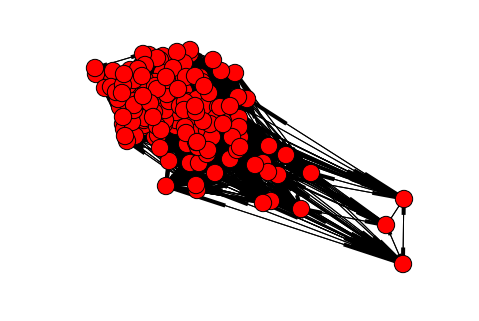

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline 

nx.draw(g)
# nx.draw_random(g)
# nx.draw_circular(g)
# nx.draw_spectral(g)

In [45]:
nx.write_graphml(g, "records.graphml")


In [36]:
pr = nx.pagerank(g)


/Users/alecmacrae/personalWorkspace/venv1/lib/python2.7/site-packages/networkx/generators/stochastic.py:56: UserWarning: zero out-degree for node flyer
  warnings.warn('zero out-degree for node %s' % u)
/Users/alecmacrae/personalWorkspace/venv1/lib/python2.7/site-packages/networkx/generators/stochastic.py:56: UserWarning: zero out-degree for node champ
  warnings.warn('zero out-degree for node %s' % u)
/Users/alecmacrae/personalWorkspace/venv1/lib/python2.7/site-packages/networkx/generators/stochastic.py:56: UserWarning: zero out-degree for node zora
  warnings.warn('zero out-degree for node %s' % u)


In [37]:
i = 1
for key, value in sorted(pr.iteritems(), key=lambda (k,v): (v,k), reverse=True):
    print "%s: %s" % (key, value)
    cursor.execute("UPDATE trueskill SET pagerank = {}, pagerank_rank = {} WHERE name = '{}' AND course = '{}';".format(
            str(value), str(i), key, course))
    cursor.execute("UPDATE predictions SET pagerank = {} WHERE name = '{}' AND course = '{}';".format(
        str(i), key, course))
    i += 1
db.commit()

flyer: 0.0390008195031
champ: 0.0345057292654
swimmer: 0.0254279854406
mime: 0.0237814134731
easter: 0.0215599869854
flyfish: 0.0182298863709
bub-gum: 0.0179910957215
honey: 0.0169797089114
zora: 0.0166813535298
dolphin: 0.0159929531126
neptune: 0.0156059323411
devil: 0.0150084750979
peaches: 0.0146356040661
snowbow: 0.0138063805979
goron: 0.0137380473228
angel: 0.0123021059815
aqua: 0.0122539628447
chaosm: 0.011183191197
ziggy: 0.0110991136544
cascade: 0.0110456519548
ram-baa: 0.0109750144103
sloth: 0.0104690957683
tiny: 0.0102835869091
sparkle: 0.0102524546293
hope: 0.0102292551419
limeguy: 0.0101030324673
buddy: 0.0100851314904
vasuki: 0.010066062989
drgnfly: 0.00995320087464
gills: 0.00982049945208
shiny: 0.00978867778386
echo: 0.009524112282
dragon: 0.00937845185945
rocky: 0.00922545459035
powim: 0.00912879887624
dopey: 0.00894601193442
boatkit: 0.00889880788866
quartz: 0.0088011744062
woody: 0.0083534961598
posidon: 0.00830601880155
papoose: 0.00794659865901
buddha: 0.00774877902